## Time Series Analysis/Forecasting: Toronto Fire Incidents

#### Dataset: https://open.toronto.ca/dataset/fire-incidents/

##### -Identifying patterns in the number of cases reported from 2011 to 2023.
##### -Forecasting trend for the succeeding year: 2024.

#### Importing Relevant Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

In [55]:
# Set plot size 
rcParams['figure.figsize'] = 10, 6

### Loading Datset

In [58]:
df = pd.read_csv("C:/Users/Study-Work/Desktop/DATA ANALYST PORTFOLIO/Fire Incidents Data Updated.csv")
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df.head(5)

Shape of the data=  (32929, 43)
Column datatypes= 
 _id                                                                int64
Area_of_Origin                                                    object
Building_Status                                                   object
Business_Impact                                                   object
Civilian_Casualties                                              float64
Count_of_Persons_Rescued                                         float64
Estimated_Dollar_Loss                                            float64
Estimated_Number_Of_Persons_Displaced                            float64
Exposures                                                        float64
Ext_agent_app_or_defer_time                                       object
Extent_Of_Fire                                                    object
Final_Incident_Type                                               object
Fire_Alarm_System_Impact_on_Evacuation                            object

C:\Users\Study-Work\AppData\Local\Temp\ipykernel_18012\2665521804.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Study-Work/Desktop/DATA ANALYST PORTFOLIO/Fire Incidents Data Updated.csv")


,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,3969357,81 - Engine Area,NaN,NaN,0.0,0.0,15000.0,NaN,NaN,2018-02-24T21:12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T21:04:29,2018-02-24T21:10:11,0.0
1,3969358,"75 - Trash, rubbish area (outside)",NaN,NaN,0.0,0.0,50.0,NaN,NaN,2018-02-24T21:29:42,...,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-24T21:24:43,2018-02-24T21:29:31,0.0
2,3969359,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T13:29:59,2018-02-25T13:36:49,0.0
3,3969360,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0.0,0.0,0.0,0.0,NaN,2018-02-25T14:19:25,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,3 - Fire with smoke showing only - including v...,2018-02-25T14:13:39,2018-02-25T14:18:07,0.0
4,3969361,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T18:20:43,2018-02-25T18:26:19,0.0


## Columns included : 
 ##### _id: Case ID.
 ##### TFS_Alarm_Time: Date and Time of the case.

In [61]:
df = df[['_id','TFS_Alarm_Time']]
df

,_id,TFS_Alarm_Time
0,3969357,2018-02-24T21:04:29
1,3969358,2018-02-24T21:24:43
2,3969359,2018-02-25T13:29:59
3,3969360,2018-02-25T14:13:39
4,3969361,2018-02-25T18:20:43
...,...,...
32924,4002281,2023-01-01T07:21:18
32925,4002282,2023-01-01T10:48:10
32926,4002283,2023-01-01T12:22:14
32927,4002284,2023-01-01T12:58:07


#### Assessing/Preparing Data

In [64]:
df.TFS_Alarm_Time

0        2018-02-24T21:04:29
1        2018-02-24T21:24:43
2        2018-02-25T13:29:59
3        2018-02-25T14:13:39
4        2018-02-25T18:20:43
                ...         
32924    2023-01-01T07:21:18
32925    2023-01-01T10:48:10
32926    2023-01-01T12:22:14
32927    2023-01-01T12:58:07
32928    2023-01-03T01:09:27
Name: TFS_Alarm_Time, Length: 32929, dtype: object

##### Changing TFS_Alarm_Time datatype to datetime.

In [67]:
pd.to_datetime(df.TFS_Alarm_Time)

0       2018-02-24 21:04:29
1       2018-02-24 21:24:43
2       2018-02-25 13:29:59
3       2018-02-25 14:13:39
4       2018-02-25 18:20:43
                ...        
32924   2023-01-01 07:21:18
32925   2023-01-01 10:48:10
32926   2023-01-01 12:22:14
32927   2023-01-01 12:58:07
32928   2023-01-03 01:09:27
Name: TFS_Alarm_Time, Length: 32929, dtype: datetime64[ns]

In [69]:
df['TFS_Alarm_Time'] = pd.to_datetime(df.TFS_Alarm_Time)

#### Grouping Cases By each month in each year.

In [72]:
grouped_df = df.groupby(pd.Grouper(key='TFS_Alarm_Time', freq='M')).size().reset_index(name='Cases')

C:\Users\Study-Work\AppData\Local\Temp\ipykernel_18012\1472494197.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped_df = df.groupby(pd.Grouper(key='TFS_Alarm_Time', freq='M')).size().reset_index(name='Cases')


In [74]:
grouped_df

,TFS_Alarm_Time,Cases
0,2011-01-31,131
1,2011-02-28,131
2,2011-03-31,173
3,2011-04-30,135
4,2011-05-31,142
...,...,...
151,2023-08-31,286
152,2023-09-30,306
153,2023-10-31,295
154,2023-11-30,300


#### Setting TFS_Alarm_Time as index.

In [77]:
grouped_df = grouped_df.set_index(grouped_df.TFS_Alarm_Time)
grouped_df

,TFS_Alarm_Time,Cases
TFS_Alarm_Time,,
2011-01-31,2011-01-31,131
2011-02-28,2011-02-28,131
2011-03-31,2011-03-31,173
2011-04-30,2011-04-30,135
2011-05-31,2011-05-31,142
...,...,...
2023-08-31,2023-08-31,286
2023-09-30,2023-09-30,306
2023-10-31,2023-10-31,295


In [79]:
grouped_df['TFS_Alarm_Time'] = pd.to_datetime(grouped_df.TFS_Alarm_Time)
grouped_df = grouped_df.set_index(grouped_df.TFS_Alarm_Time)
grouped_df.drop('TFS_Alarm_Time', axis = 1, inplace = True)
print('Column datatypes= \n',grouped_df.dtypes)
grouped_df

Column datatypes= 
 Cases    int64
dtype: object


,Cases
TFS_Alarm_Time,
2011-01-31,131
2011-02-28,131
2011-03-31,173
2011-04-30,135
2011-05-31,142
...,...
2023-08-31,286
2023-09-30,306
2023-10-31,295


## Time Series Characteristics

## Trend

Text(0.5, 1.0, 'Trend of the Time Series')

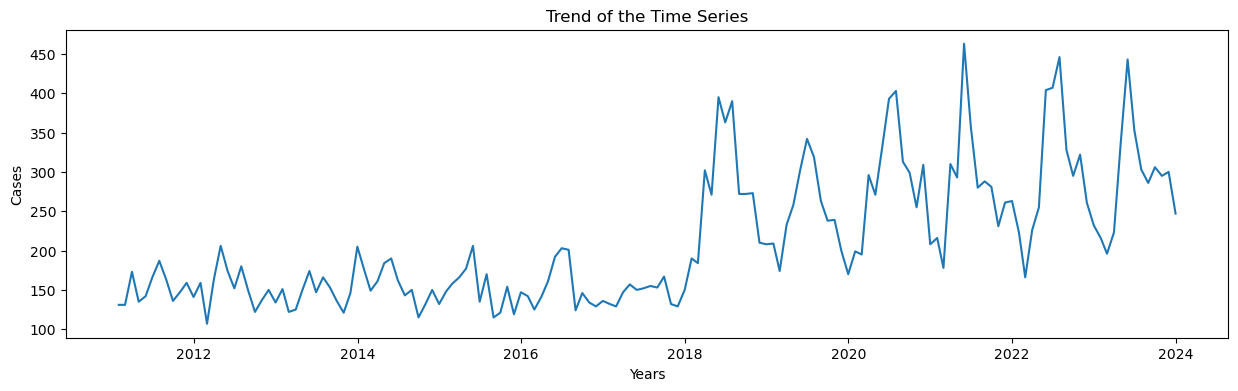

In [83]:
plt.figure(figsize= (15,4))
plt.plot(grouped_df)
plt.xlabel('Years')
plt.ylabel('Cases')
plt.title('Trend of the Time Series')

As seen from the above plot there is a dramatic upward trend of number of cases reported from the year 2017.

### Variance
From the years 2011-2017 the variance broadly appears to be close as is the average number of cases same.
It increases from the year 2018 onwards and remaining relatively similar up till 2023.

### Seasonality
We can also see the graph going up and down at regular interval uptil 2017 when the cases increase sharply and then continue to lead to the formation of the same pattern which is the sign of seasonality. 



<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='Cases'>

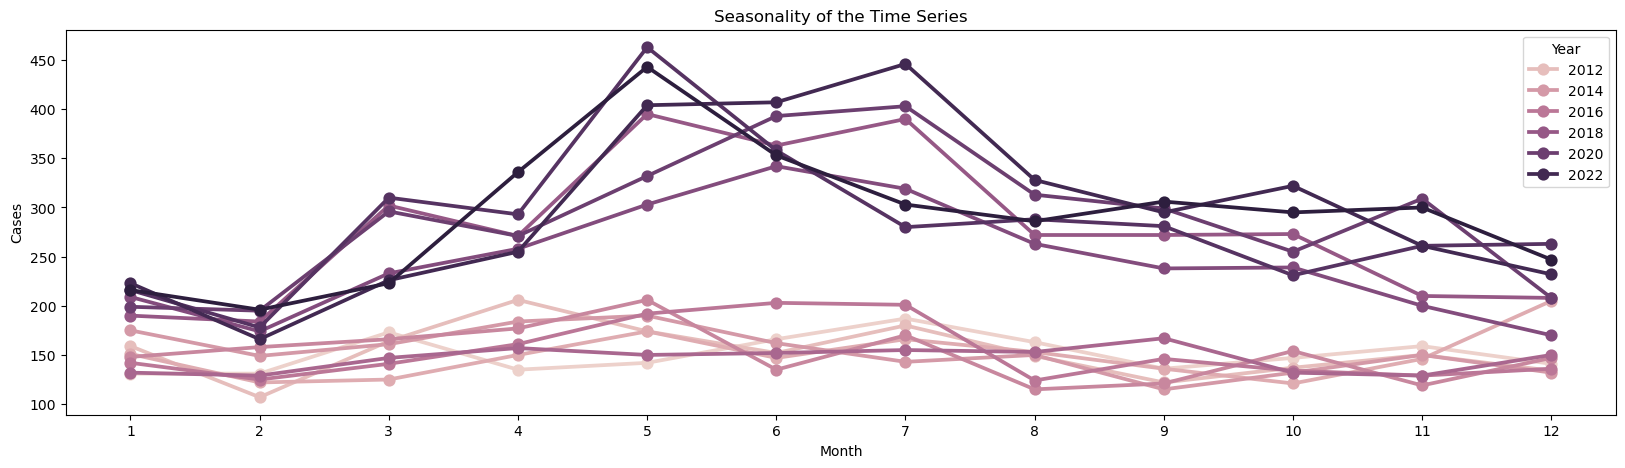

In [104]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = grouped_df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

# Stacked line plot
plt.figure(figsize=(20,5))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Cases',hue='Year',data=df_temp)

The graph shows that:

**From the year 2012 to the year 2017:**

- Broadly, 2nd Month (February) onwards the recorded cases started to rise, peaked from 5th Month(May)- 7th Month (July) and tend to decrease from 8th Month (August).

**From the year 2018 to the year 2023:**

- Broadly, 2nd Month (February) onwards the recorded cases started to rise, peaked from 5th Month(May)- 7th Month (July) and tend to decrease from 8th Month (August).
- However, the average number of cases recorded and the variance dramatically changed.



#### Decomposition of Time Series

Deconstruction of the time series data into several components like trend and seasonality for visualization of time series characteristics.


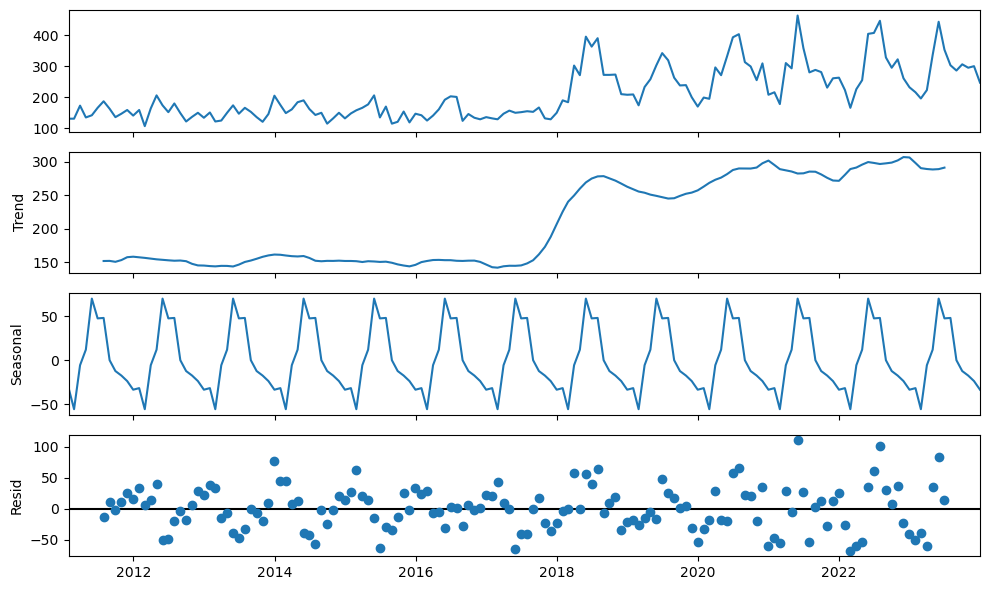

In [117]:
decomposition = sm.tsa.seasonal_decompose(grouped_df, model='additive')
fig = decomposition.plot()

# Forecasting
### Time Series Forecasting Models

## 1. Naive Bayes
In this technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.
All the predictions are equal to the last observed point.


In [120]:
grouped_df['naive_pred'] = grouped_df.Cases.shift(1)

In [122]:
grouped_df

,Cases,naive_pred
TFS_Alarm_Time,,
2011-01-31,131,NaN
2011-02-28,131,131.0
2011-03-31,173,131.0
2011-04-30,135,173.0
2011-05-31,142,135.0
...,...,...
2023-08-31,286,303.0
2023-09-30,306,286.0
2023-10-31,295,306.0


In [124]:
from sklearn.metrics import mean_squared_error
y_actual =grouped_df.Cases.values[10:]
y_pred = grouped_df.naive_pred.values[10:]
rmse = (np.sqrt(mean_squared_error(y_actual, y_pred)))
print(rmse)

47.072663154301736


In [126]:
dates = grouped_df.index[10:]

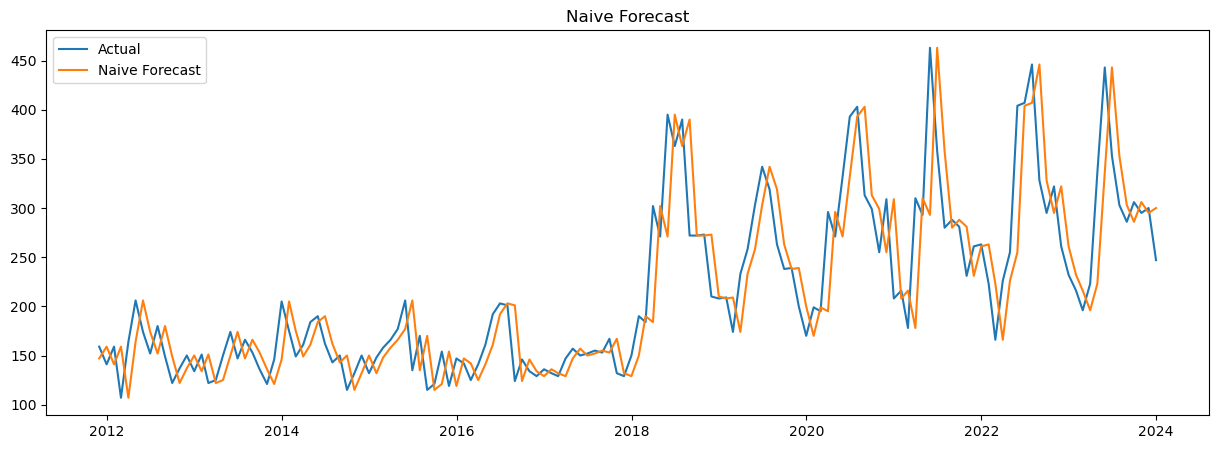

In [128]:
plt.figure(figsize=(15,5)) 
plt.plot(dates,y_actual, label='Actual') 
plt.plot(dates,y_pred, label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

## 2) Moving Average
In this technique, we will take the average of the number of cases in the the last few time periods only.
We will try rolling mean for the last 10, 15 days and visualize the results.

In [131]:
grouped_df['ma_5_pred'] = grouped_df.Cases.rolling(5).mean()
grouped_df['ma_10_pred'] = grouped_df.Cases.rolling(10).mean()
 

In [133]:
grouped_df.head(15)

,Cases,naive_pred,ma_5_pred,ma_10_pred
TFS_Alarm_Time,,,,
2011-01-31,131,NaN,NaN,NaN
2011-02-28,131,131.0,NaN,NaN
2011-03-31,173,131.0,NaN,NaN
2011-04-30,135,173.0,NaN,NaN
2011-05-31,142,135.0,142.4,NaN
2011-06-30,166,142.0,149.4,NaN
2011-07-31,187,166.0,160.6,NaN
2011-08-31,163,187.0,158.6,NaN
2011-09-30,136,163.0,158.8,NaN


In [135]:
ma_5_pred = grouped_df['ma_5_pred'].values[10:]
ma_10_pred = grouped_df['ma_10_pred'].values[10:]

In [137]:
rmse_ma5 = (np.sqrt(mean_squared_error(y_actual, ma_5_pred)))
print(rmse_ma5)

47.5081334060393


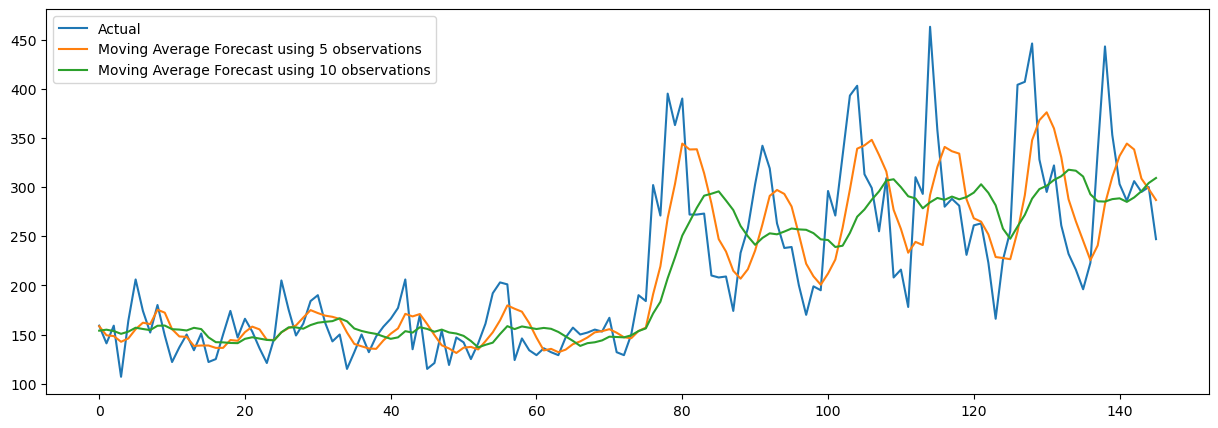

In [139]:
plt.figure(figsize=(15,5)) 
plt.plot(y_actual, label='Actual') 
plt.plot(ma_5_pred,label='Moving Average Forecast using 5 observations')
plt.plot(ma_10_pred,label='Moving Average Forecast using 10 observations')
plt.legend(loc='best') 
plt.show()

## 3) Simple Exponential Smoothing
In this technique, we assign more weight to more recent observations than to observations from the distant past. The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.
Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.

In [142]:
model = SimpleExpSmoothing(grouped_df['Cases'].values)
fitted_model = model.fit(smoothing_level = .2, optimized = False)
grouped_df['SES_pred'] = fitted_model.fittedvalues

In [144]:
grouped_df

,Cases,naive_pred,ma_5_pred,ma_10_pred,SES_pred
TFS_Alarm_Time,,,,,
2011-01-31,131,NaN,NaN,NaN,131.000000
2011-02-28,131,131.0,NaN,NaN,131.000000
2011-03-31,173,131.0,NaN,NaN,131.000000
2011-04-30,135,173.0,NaN,NaN,139.400000
2011-05-31,142,135.0,142.4,NaN,138.520000
...,...,...,...,...,...
2023-08-31,286,303.0,344.2,284.9,312.511103
2023-09-30,306,286.0,338.2,289.4,307.208883
2023-10-31,295,306.0,308.6,295.7,306.967106


In [146]:
SES_pred = grouped_df['SES_pred'].values[10:]

In [148]:
rmse_SES = (np.sqrt(mean_squared_error(y_actual, SES_pred)))
print(rmse_SES)

55.8156344160193


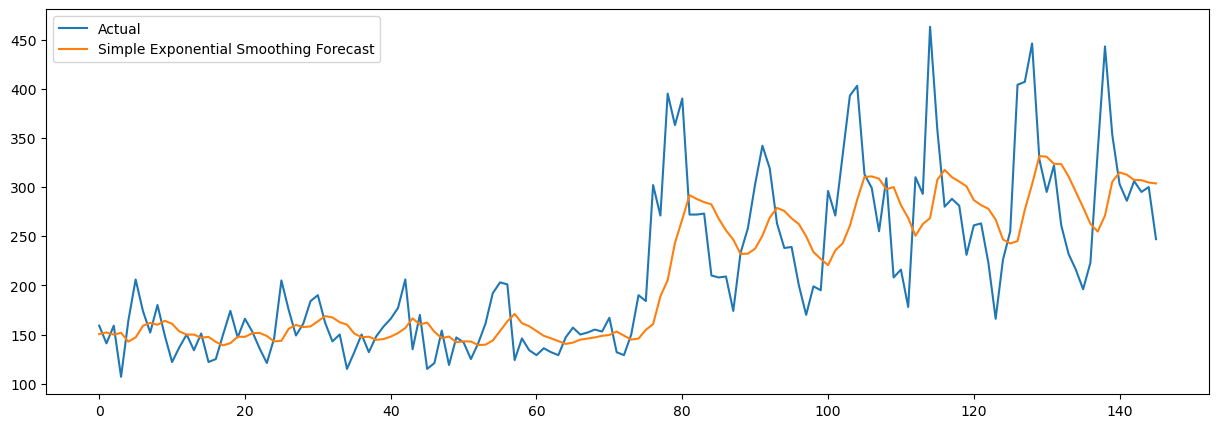

In [150]:
plt.figure(figsize=(15,5)) 
plt.plot(y_actual, label='Actual') 
plt.plot(SES_pred,label='Simple Exponential Smoothing Forecast')
plt.legend(loc='best') 
plt.show()

In [152]:
grouped_df

,Cases,naive_pred,ma_5_pred,ma_10_pred,SES_pred
TFS_Alarm_Time,,,,,
2011-01-31,131,NaN,NaN,NaN,131.000000
2011-02-28,131,131.0,NaN,NaN,131.000000
2011-03-31,173,131.0,NaN,NaN,131.000000
2011-04-30,135,173.0,NaN,NaN,139.400000
2011-05-31,142,135.0,142.4,NaN,138.520000
...,...,...,...,...,...
2023-08-31,286,303.0,344.2,284.9,312.511103
2023-09-30,306,286.0,338.2,289.4,307.208883
2023-10-31,295,306.0,308.6,295.7,306.967106
